# read

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/input/train_df.csv', encoding='cp949')
test  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/input/test_df.csv', encoding='cp949')
sub   = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/input/sample_submission.csv', encoding='cp949')

In [25]:
train.shape, test.shape, sub.shape

((32000, 6), (4640, 5), (4640, 2))

In [26]:
train.head()

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM,INVC_CONT
0,0,1129000014045300,5011000220046300,패션의류,상의,3
1,1,1135000009051200,5011000178037300,생활/건강,반려동물,3
2,2,1135000030093100,5011000265091400,패션의류,기타패션의류,9
3,3,1154500002014200,5011000315087400,식품,농산물,10
4,4,1165000021008300,5011000177051200,식품,가공식품,3


In [5]:
test.head()

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM
0,32000,5013000043028400,1165000021097200,식품,농산물
1,32001,5013000044016100,1154500002066400,식품,농산물
2,32002,5013000205030200,4139000102013200,식품,농산물
3,32003,5013000205030200,4221000040093400,식품,농산물
4,32004,5013000268011400,2726000004017100,식품,농산물


In [10]:
train['INNB_0'] = train['SEND_SPG_INNB'].astype('str').str[:1]

In [11]:
train.head()

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM,INVC_CONT,INNB_0
0,0,1129000014045300,5011000220046300,패션의류,상의,3,1
1,1,1135000009051200,5011000178037300,생활/건강,반려동물,3,1
2,2,1135000030093100,5011000265091400,패션의류,기타패션의류,9,1
3,3,1154500002014200,5011000315087400,식품,농산물,10,1
4,4,1165000021008300,5011000177051200,식품,가공식품,3,1


In [23]:
dict = {}
for i, j in enumerate(train.groupby(train['SEND_SPG_INNB'].astype('str').str[:1]).sum().sort_values('INVC_CONT').index):
    print(i, j)
    dict[j] = i

print(dict)

0 3
1 2
2 1
3 4
4 5
{'3': 0, '2': 1, '1': 2, '4': 3, '5': 4}


In [18]:
train.groupby('INNB_0').sum().sort_values('INVC_CONT')

,index,SEND_SPG_INNB,REC_SPG_INNB,INVC_CONT
INNB_0,,,,
3,4306885.0,8.006900e+17,1.318003e+18,1387.0
2,8921808.0,1.503896e+18,2.756300e+18,2908.0
1,13159414.0,9.790180e+17,4.304903e+18,4836.0
4,79632343.0,2.105432e+19,2.497724e+19,29495.0
5,405963550.0,1.270215e+20,8.546421e+19,113946.0


<AxesSubplot:>

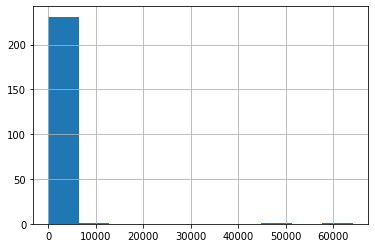

In [ ]:
train.groupby('INNB_0').sum()['INVC_CONT'].hist()

<AxesSubplot:>

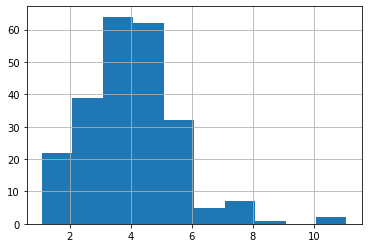

In [ ]:
np.log(train.groupby('INNB_0').sum()['INVC_CONT']).hist()

In [ ]:
train['INNB_1'] = train['SEND_SPG_INNB'].astype('str').str[:3]

In [ ]:
train.groupby('INNB_1').sum()

,index,SEND_SPG_INNB,REC_SPG_INNB,INVC_CONT
INNB_1,,,,
111,3707305.0,2.633330e+17,1.182700e+18,1705.0
112,2502281.0,1.654875e+17,7.366971e+17,646.0
113,851414.0,6.806250e+16,3.006820e+17,336.0
114,330019.0,3.548200e+16,1.553510e+17,199.0
115,3160929.0,2.329630e+17,1.012364e+18,995.0
...,...,...,...,...
482,334822.0,1.254250e+17,1.303040e+17,149.0
483,153113.0,5.799600e+16,6.013400e+16,66.0
487,108617.0,3.411100e+16,3.508100e+16,36.0


In [ ]:
train['INNB_2'] = train['SEND_SPG_INNB'].astype('str').str[:2]

In [ ]:
train.groupby('INNB_2').sum().sort_values('INVC_CONT', ascending=False)

,index,SEND_SPG_INNB,REC_SPG_INNB,INVC_CONT
INNB_2,,,,
5011,224343008.0,7.016904e+19,4.745318e+19,64098.0
5013,181620542.0,5.685244e+19,3.801103e+19,49848.0
4148,19465949.0,4.990045e+18,6.028834e+18,6588.0
4141,5814635.0,1.503183e+18,1.819151e+18,1896.0
4159,6231355.0,1.642805e+18,1.979531e+18,1841.0
...,...,...,...,...
4129,14648.0,4.129000e+15,5.011000e+15,4.0
3120,19562.0,3.120000e+15,5.011000e+15,3.0
4277,11326.0,4.277001e+15,5.013001e+15,3.0


In [ ]:
train['INNB_2'] = train['SEND_SPG_INNB'].astype('str').str[:4]


In [ ]:
train.groupby('INNB_2').sum()

,index,SEND_SPG_INNB,REC_SPG_INNB,INVC_CONT
INNB_2,,,,
1111,502083.0,3.555200e+16,1.603620e+17,243.0
1114,498438.0,3.230600e+16,1.453410e+17,370.0
1117,2706784.0,1.954750e+17,8.769971e+17,1092.0
1120,486669.0,3.360000e+16,1.503480e+17,156.0
1121,244088.0,1.457950e+16,6.514500e+16,72.0
...,...,...,...,...
4887,95361.0,1.954800e+16,2.004600e+16,19.0
4888,59230.0,1.955200e+16,2.005000e+16,25.0
4889,16297.0,9.778000e+15,1.002200e+16,34.0


In [ ]:
train.groupby('DL_GD_LCLS_NM').sum()[['INVC_CONT']]

,INVC_CONT
DL_GD_LCLS_NM,
디지털/가전,1578.0
생활/건강,10924.0
식품,129209.0
여행/문화,5911.0
패션의류,3887.0
화장품/미용,1063.0


In [ ]:
train.groupby('DL_GD_MCLS_NM').sum()[['INVC_CONT']]

,INVC_CONT
DL_GD_MCLS_NM,
가공식품,6283.0
건강식품,3763.0
건강용품,1802.0
과자,2007.0
기타디지털/가전,1578.0
기타식품,4696.0
기타패션의류,2708.0
냉동/간편조리식품,2068.0
농산물,95239.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          32000 non-null  int64 
 1   SEND_SPG_INNB  32000 non-null  int64 
 2   REC_SPG_INNB   32000 non-null  int64 
 3   DL_GD_LCLS_NM  32000 non-null  object
 4   DL_GD_MCLS_NM  32000 non-null  object
 5   INVC_CONT      32000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.5+ MB


In [ ]:
train.isnull().sum()

index            0
SEND_SPG_INNB    0
REC_SPG_INNB     0
DL_GD_LCLS_NM    0
DL_GD_MCLS_NM    0
INVC_CONT        0
dtype: int64

In [ ]:
test.isnull().sum()

index            0
SEND_SPG_INNB    0
REC_SPG_INNB     0
DL_GD_LCLS_NM    0
DL_GD_MCLS_NM    0
dtype: int64

# encoding

In [ ]:
train_one = pd.get_dummies(train)
test_one  = pd.get_dummies(test)

In [ ]:
train_one.head()

,index,SEND_SPG_INNB,REC_SPG_INNB,INVC_CONT,DL_GD_LCLS_NM_디지털/가전,DL_GD_LCLS_NM_생활/건강,DL_GD_LCLS_NM_식품,DL_GD_LCLS_NM_여행/문화,DL_GD_LCLS_NM_패션의류,DL_GD_LCLS_NM_화장품/미용,...,DL_GD_MCLS_NM_문화컨텐츠,DL_GD_MCLS_NM_반려동물,DL_GD_MCLS_NM_상의,DL_GD_MCLS_NM_생활용품,DL_GD_MCLS_NM_수산,DL_GD_MCLS_NM_스킨케어,DL_GD_MCLS_NM_음료,DL_GD_MCLS_NM_음반,DL_GD_MCLS_NM_주방용품,DL_GD_MCLS_NM_축산
0,0,1129000014045300,5011000220046300,3,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,1,1135000009051200,5011000178037300,3,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2,1135000030093100,5011000265091400,9,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1154500002014200,5011000315087400,10,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1165000021008300,5011000177051200,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# modeling

In [ ]:
X = train_one.drop('INVC_CONT', axis=1)
y = train_one['INVC_CONT']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((25600, 29), (6400, 29), (25600,), (6400,))

In [ ]:
from lightgbm import LGBMRegressor

model = LGBMRegressor()

model.fit(X_train, y_train)
y_pred = model.predict(X_val)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val, y_pred, squared=False)

5.273774537653919

In [ ]:
pred = model.predict(test_one)
sub['INVC_CONT'] = pred

In [ ]:
sub.head()

,index,INVC_CONT
0,32000,4.489352
1,32001,5.993685
2,32002,4.102006
3,32003,4.598221
4,32004,4.583914


In [ ]:
sub.to_csv('./sub/baseline.csv', index=False)